In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("C:\\Users\\Kavya\\Desktop\\DS Assignments\\ML\\logistic\\bank-full.csv", delimiter=";",quotechar='"')

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.shape

(45211, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

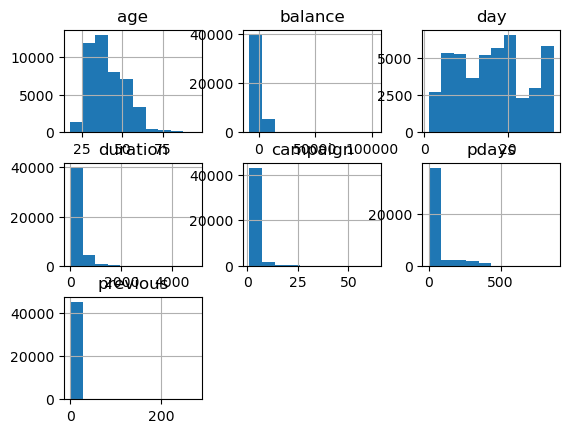

In [8]:
data.hist()

C:\Users\Kavya\AppData\Local\Temp\ipykernel_13792\1468621174.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


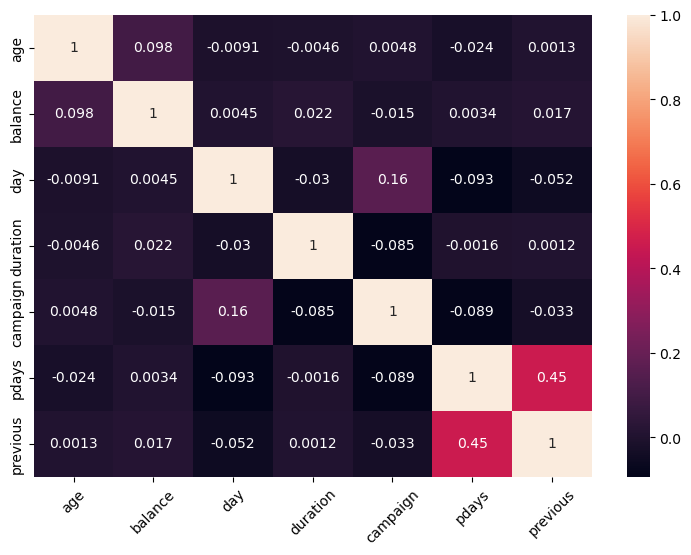

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize= (9,6))
sns.heatmap(data.corr(), annot=True)
plt.xticks(rotation=45)
plt.show()

In [15]:
# lets find how many discrete and continuous feature are there in dataset bybsepeartin them in variables
discrete_feature = [feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 10


In [16]:
continuous_feature = [feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


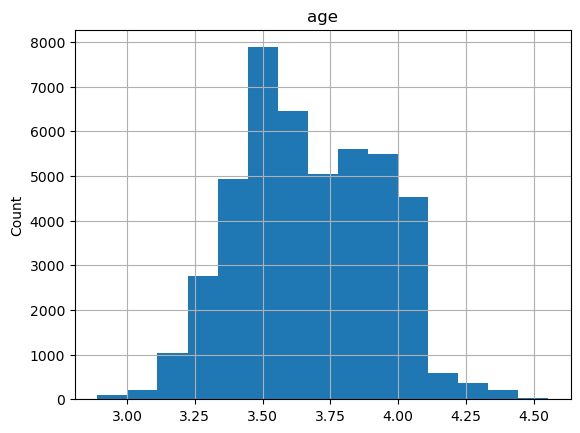

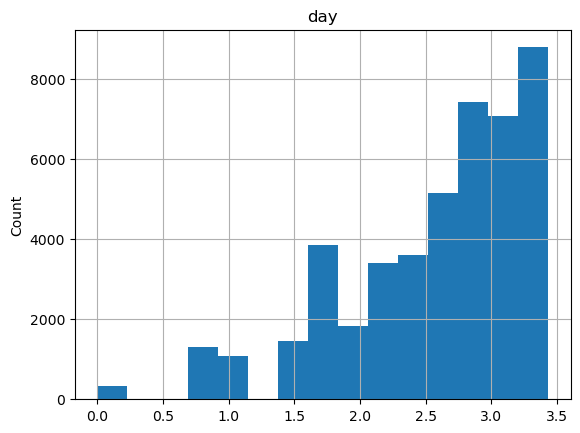

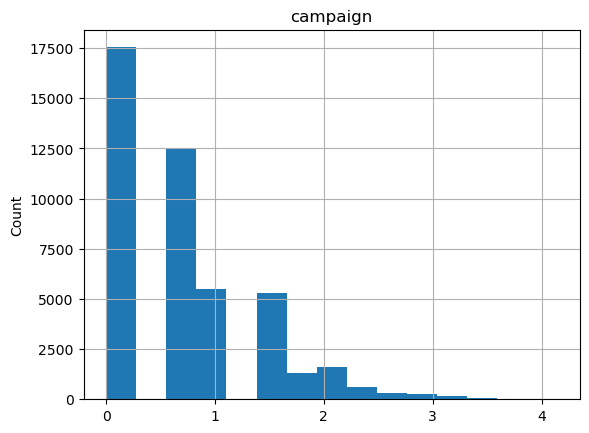

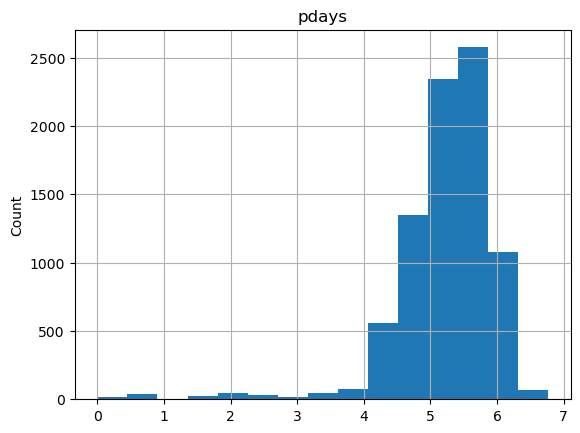

In [17]:
# LOG transformation
for feature in continuous_feature:
    data_1 = data.copy()
    if 0 in data_1[feature].unique():
        pass
    else:
        data_1[feature] = np.log(data_1[feature])
        data_1[feature].hist(bins=15)
        plt.ylabel('Count')
        plt.title(feature)
        plt.show()

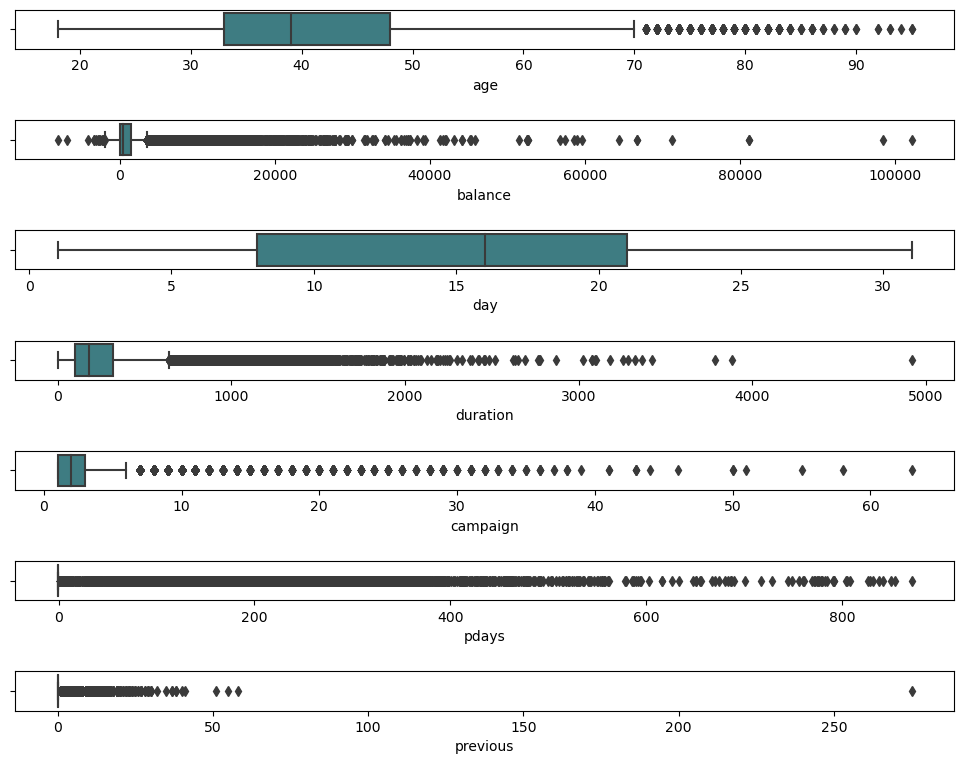

In [18]:
# Outliers detection
outlier = data.copy() 
fig, axes = plt.subplots(7,1,figsize=(10,8), sharex=False, sharey=False)
sns.boxplot(x='age',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='balance',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='day',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='duration',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='campaign',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='pdays',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='previous',data=outlier,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

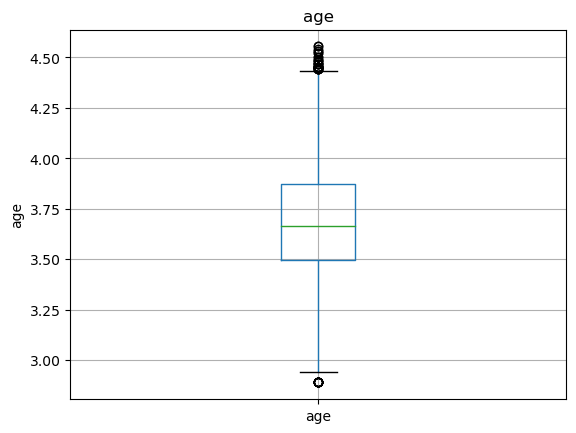

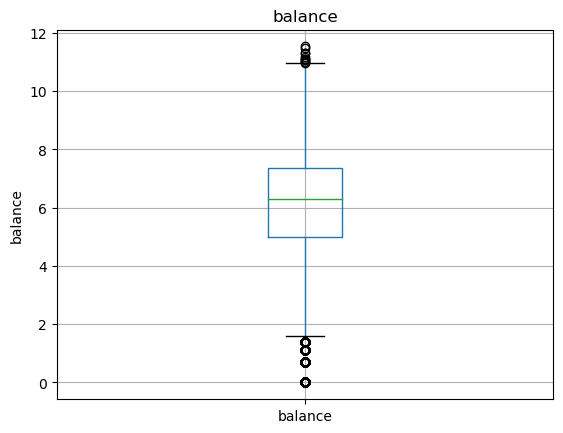

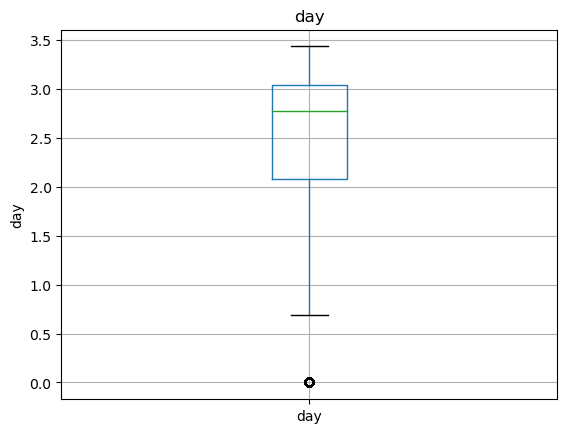

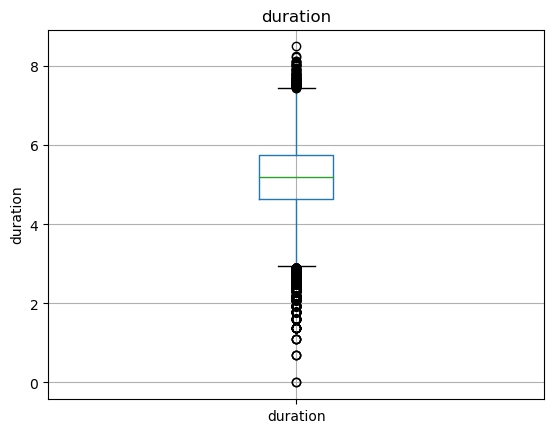

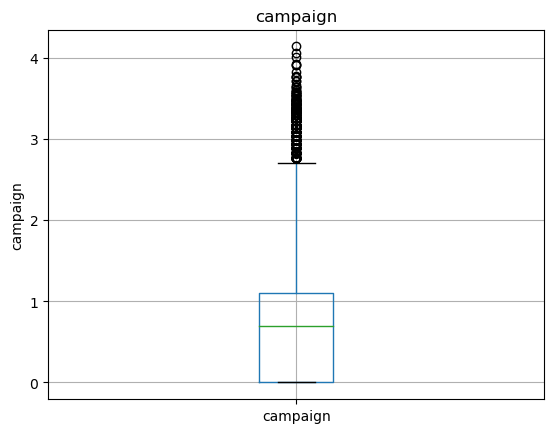

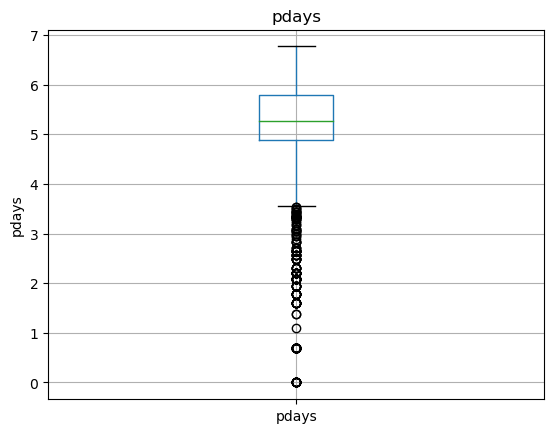

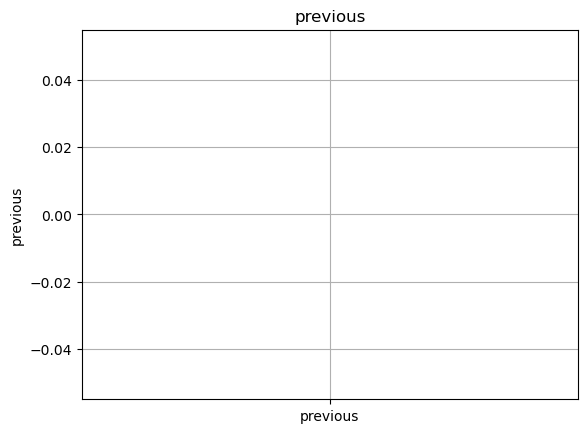

In [19]:
# After log-transformation
for feature in continuous_feature:
    data_2 = data.copy()
    data_2[feature] = np.log(data_2[feature])
    data_2.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [103]:
#Data preprocessing
data[['job','marital','education','default','housing','loan','contact','poutcome','month','y']] = data[
    ['job','marital','education','default','housing','loan','contact','poutcome','month','y']].astype('category')

In [104]:
data_new = data

In [105]:
data_new

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [107]:
#label encoding
data_new['month'] = data_new['month'].cat.codes
data_new['job'] = data_new['job'].cat.codes
data_new['marital'] = data_new['marital'].cat.codes
data_new['education'] = data_new['education'].cat.codes
data_new['default'] = data_new['default'].cat.codes
data_new['housing'] = data_new['housing'].cat.codes
data_new['loan'] = data_new['loan'].cat.codes
data_new['contact'] = data_new['contact'].cat.codes
data_new['poutcome'] = data_new['poutcome'].cat.codes
data_new['y'] = data_new['y'].cat.codes

In [108]:
# MOdel building
x1 = data_new.drop('y', axis=1)
y1 = data_new[['y']]

In [109]:
x1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [110]:
y1

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [137]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size=0.20,random_state=12)
print("Shape of X_train : ",x_train.shape)
print("Shape of X_test  : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of X_train :  (36168, 16)
Shape of X_test  :  (9043, 16)
Shape of y_train :  (36168, 1)
Shape of y_test  :  (9043, 1)


In [138]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [139]:
logistic_model.coef_

array([[-2.32920895e-02,  1.86160656e-02, -1.16066289e-01,
        -1.72144250e-02, -5.58760138e-03,  3.34732121e-05,
        -2.29290818e-01, -6.87309305e-02, -2.35633295e-01,
        -1.67372485e-02, -5.99511694e-02,  3.46032100e-03,
        -3.33383662e-01, -1.08789748e-03,  1.36649806e-01,
        -2.22556895e-01]])

In [140]:
logistic_model.intercept_

array([-0.08853068])

In [141]:
# minMax Scaler
scalar = MinMaxScaler(feature_range= (0,1))
scalar.fit(data_new)
scaled_x = scalar.transform(data_new)

In [142]:
scaled_x

array([[0.51948052, 0.36363636, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.33766234, 0.81818182, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.19480519, 0.18181818, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.7012987 , 0.45454545, 0.5       , ..., 0.01090909, 0.66666667,
        1.        ],
       [0.50649351, 0.09090909, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.24675325, 0.18181818, 0.5       , ..., 0.04      , 0.33333333,
        0.        ]])

In [143]:
classifier1 = LogisticRegression()
classifier1.fit(scaled_x,y1)

LogisticRegression()

In [144]:
classifier1.coef_

array([[ 0.0870051 ,  0.04775924,  0.12651324,  0.16252677, -0.0576052 ,
         0.03974224, -0.34339486, -0.23072377, -0.46707242, -0.10404694,
         0.124258  ,  0.90757706, -0.1296082 ,  0.21393142,  0.01923177,
        -0.1480058 , 13.73203525]])

In [145]:
proba1 = classifier1.predict_proba(scaled_x)
proba1

array([[9.99760781e-01, 2.39218924e-04],
       [9.99762234e-01, 2.37766449e-04],
       [9.99832546e-01, 1.67453699e-04],
       ...,
       [1.67888481e-03, 9.98321115e-01],
       [9.99598875e-01, 4.01125023e-04],
       [9.99437111e-01, 5.62889153e-04]])

In [146]:
y_pred1 = classifier1.predict(scaled_x)
y_pred1

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

In [147]:
# Model testing
# Train Data
y_pred_train1 = logistic_model.predict(x_train)

In [148]:
print(confusion_matrix(y_train, y_pred_train1))

[[31349   580]
 [ 3513   726]]


In [149]:
print(classification_report(y_train,y_pred_train1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31929
           1       0.56      0.17      0.26      4239

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



In [150]:
accuracy_score(y_train,y_pred_train1)

0.8868336651183366

AUC score : 81.68%


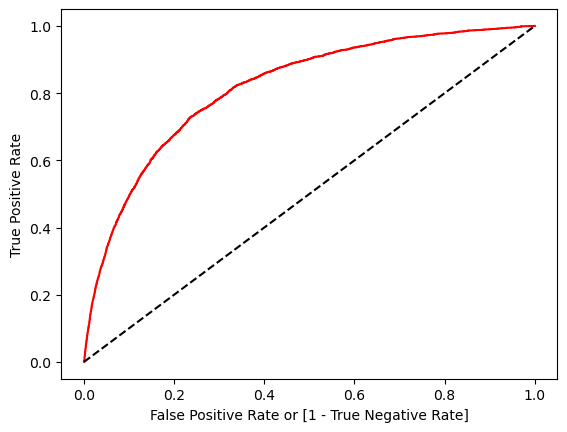

In [151]:
fpr, tpr, thresholds = roc_curve(y_train,logistic_model.predict_proba (x_train)[:,1])

auc = roc_auc_score(y_train,logistic_model.predict_proba (x_train)[:,1])
print('AUC score : {:.2f}%'.format(auc*100))

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [152]:
classification_report1 = classification_report(y_train,y_pred_train1)
print(classification_report1)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31929
           1       0.56      0.17      0.26      4239

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



In [153]:
# Test Data
y_pred_test1 = logistic_model.predict(x_test)

In [154]:
print(confusion_matrix(y_test,y_pred_test1))

[[7847  146]
 [ 851  199]]


In [155]:
print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.58      0.19      0.29      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.59      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [156]:
accuracy_score(y_test,y_pred_test1)

0.8897489771093664

AUC score : 83.03%


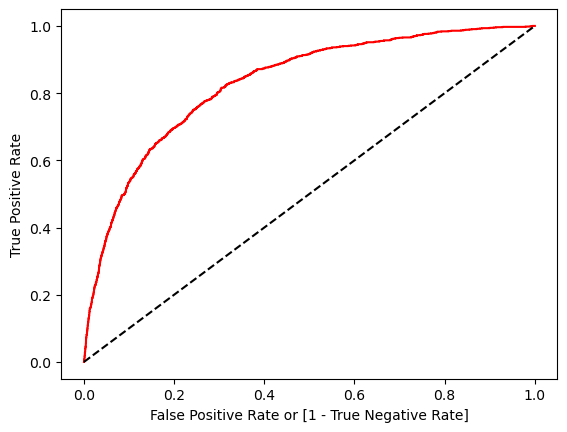

In [157]:
fpr, tpr, thresholds = roc_curve(y_test,logistic_model.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_test,logistic_model.predict_proba (x_test)[:,1])
print('AUC score : {:.2f}%'.format(auc*100))

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [158]:
classification_report2 = classification_report(y_test,y_pred_test1)
print(classification_report2)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.58      0.19      0.29      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.59      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [159]:
# Compare train set and test set accuracy
print('Training set score : {:.2f}%'.format(logistic_model.score(x_train, y_train)*100))
print('Test set score     : {:.2f}%'.format(logistic_model.score(x_test, y_test)*100))

Training set score : 88.68%
Test set score     : 88.97%
